**Implementing ML models for anamoly detection**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1SA1xmv9_hundred_data_1.csv to 1SA1xmv9_hundred_data_1.csv
Saving 2SA2xmv6_twentyeight_data_1.csv to 2SA2xmv6_twentyeight_data_1.csv
Saving 3SA3xmeas10_001_data_1.csv to 3SA3xmeas10_001_data_1.csv
Saving 4DA1xmv10_359_data_1.csv to 4DA1xmv10_359_data_1.csv
Saving 5DA2xmeas7_zero_data_1.csv to 5DA2xmeas7_zero_data_1.csv


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import io
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv(io.StringIO(uploaded['3SA3xmeas10_001_data_1.csv'].decode('utf-8')))
xmeas = np.asarray(data)
xmeas
print(str(len(data)))
#pd.read_csv(io.StringIO(uploaded['X_trainData_1.csv'].decode('utf-8')))

4800


**Preprocessing data**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
#data.isnull().sum()

In [ ]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [ ]:
for feature in constant_columns:
     print(feature)

**Apply PCA to reduce dimensions to 2 variables**

In [ ]:
# Preprocessing the data to make it visualizable
  
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
 
# Normalizing the Data
X_normalized = normalize(X_scaled)
 
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
  
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
  
X_principal.head()
print(str(len(X_principal)))

4800


**Dividing dataset into test and train**

In [ ]:
X_train, X_test = X_principal[:4000], X_principal[4000:]

**Applying Spectral Clustering Algorithm**

In [ ]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
  
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
#labels_rbf = spectral_model_rbf.fit_predict(X_train)

print(labels_rbf)
print(str(len(labels_rbf)))


[0 0 0 ... 1 1 1]
4800


In [ ]:
y1 = np.zeros(4000)
y2 = np.ones(800)
y_ground = np.append(y1,y2)
str(len(y_ground))

'4800'

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
labels_predict = spectral_model_rbf.fit_predict(X_test)
#print(labels_predict)

In [59]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print("Spectral :")
print(f"Accuracy: {round(accuracy_score(y_ground, labels_rbf), 2)}") 
print(f"Precision: {round(precision_score(y_ground, labels_rbf), 2)}")
print(f"Recall: {round(recall_score(y_ground, labels_rbf), 2)}")
print(f"F1_score: {round(f1_score(y_ground, labels_rbf), 2)}")

Spectral :
Accuracy: 0.97
Precision: 1.0
Recall: 0.84
F1_score: 0.92


**Visualising Clusters through graph**

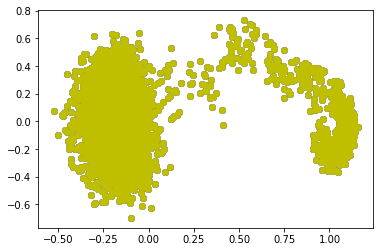

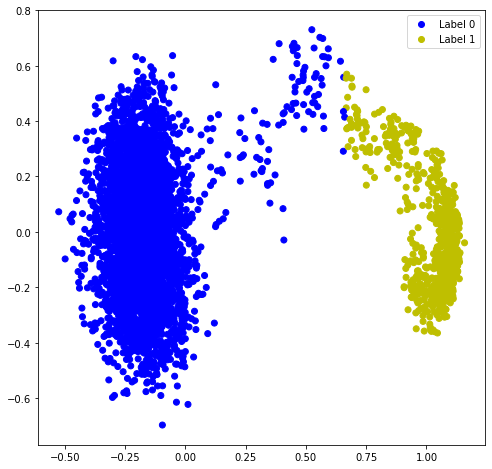

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b')
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y')
  
plt.figure(figsize =(8, 8))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

**Applying Nearest Neighbors**

In [ ]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [ ]:
print("NN")
print(f"Accuracy: {round(accuracy_score(y_ground, labels_nn), 2)}") 
print(f"Precision: {round(precision_score(y_ground, labels_nn), 2)}")
print(f"Recall: {round(recall_score(y_ground, labels_nn), 2)}")
print(f"F1_score: {round(f1_score(y_ground, labels_nn), 2)}")

Accuracy: 0.98
Precision: 1.0
Recall: 0.85
F1_score: 0.92


In [51]:

# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']
  
# List of Silhouette Scores
s_scores = []
  
# Evaluating the performance
s_scores.append(silhouette_score(data, labels_rbf))
s_scores.append(silhouette_score(data, labels_nn))

#print(s_scores)  
print("Spectral score:" ,s_scores[0])
print("Nearest neighbors score:" ,s_scores[1])

Spectral score: 0.6895639081911257
Nearest neighbors score: 0.6900079123254066


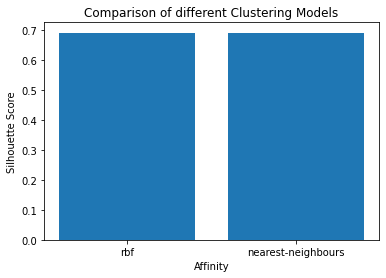

In [52]:
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

**Applying OPTICS and DBSCAN**

In [53]:
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

In [54]:
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
  
# Renaming the columns
X_normalized.columns = data.columns
  
#X_normalized.head()

In [55]:

# Building the OPTICS Clustering model
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)
  
# Training the model
#optics_model.fit(X_normalized)
optics_model.fit_predict(X_normalized)

array([-1, -1, -1, ...,  0,  0,  0])

In [56]:
# Producing the labels according to the DBSCAN technique with eps = 0.5
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.5)
  
# Producing the labels according to the DBSCAN technique with eps = 2.0
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 2)
  
# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(X_normalized))
  
# Storing the reachability distance of each point
reachability = optics_model.reachability_[optics_model.ordering_]
  
# Storing the cluster labels of each point
labels = optics_model.labels_[optics_model.ordering_]
  
#unique, counts = np.unique(labels, return_counts=True)
#print(dict(zip(unique, counts)))
#print(labels.count(1))
# Evaluating the performance
score= []
score.append(silhouette_score(data,labels))
print("OPTICS accuracy score: ", score[0])

OPTICS accuracy score:  0.6769593319986383


**Vizualising through graph plotting**

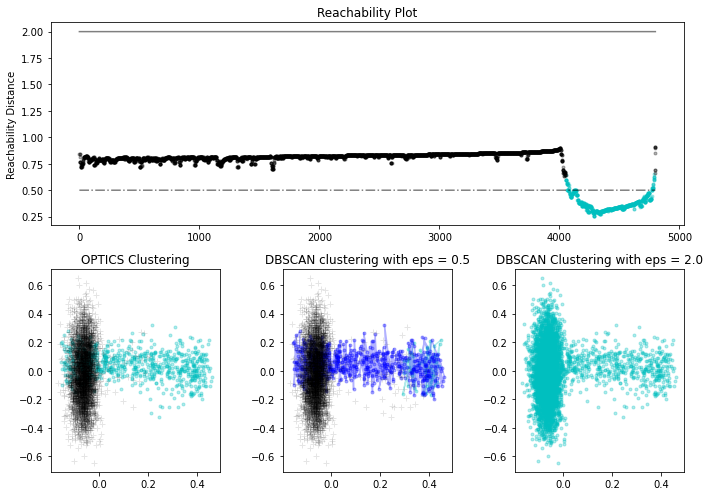

In [57]:
# Defining the framework of the visualization
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])
  
# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
  
# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = X_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0],
        X_normalized.iloc[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')
  
# Plotting the DBSCAN Clustering with eps = 0.5
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = X_normalized[labels1 == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
        
ax3.plot(X_normalized.iloc[labels1 == -1, 0],
        X_normalized.iloc[labels1 == -1, 1],
       'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')
  
# Plotting the DBSCAN Clustering with eps = 2.0
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = X_normalized.iloc[labels2 == Class]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
          
ax4.plot(X_normalized.iloc[labels2 == -1, 0],
        X_normalized.iloc[labels2 == -1, 1],
       'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')
  
  
plt.tight_layout()
plt.show()